In [1]:
import pandas as pd
import os
from os import walk
import datetime
pd.set_option('display.max_columns', 500)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date

import csv

import folium

In [2]:
current_directory = r'C:\Users\ekaterina.adischeva\Documents\Scripts\BD_task\Техническое задание_аналитик больших данных\Данные'
current_directory = current_directory.replace('\\','/')
os.chdir(current_directory)

In [3]:
data = pd.read_csv('02_Data.csv', sep = ';', dtype = {'imei': str, 'lac' : 'str', 'cid' : 'str'})
facts = pd.read_excel('01_Факты.xlsx', header = None)
tac_dict = pd.read_csv('03_устройства.csv', quoting=csv.QUOTE_NONE)
event_type = pd.read_excel('04_event_type.xlsx')

In [4]:
tac_dict.columns = tac_dict.columns.str.replace('\"','')
for column_name in tac_dict.columns:
    tac_dict[column_name] = tac_dict[column_name].str.replace('\"','')

In [5]:
data['datetime'] = pd.to_timedelta(data['tstamp']/1000, unit='S') + pd.Timestamp('1970-1-1')
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
data['tac'] = data['imei'].str.slice(0,8)

In [7]:
data = data.merge(event_type, left_on = ['event_type'], right_on = 'Номер', how = 'left')
data = data.merge(tac_dict, on = ['tac'], how = 'left')

In [8]:
data.columns

Index(['lac', 'cid', 'msisdn', 'imei', 'event_type', 'tstamp', 'long', 'lat',
       'max_dist', 'cell_type', 'start_angle', 'end_angle', 'datetime', 'tac',
       'Номер', 'Обозначение', 'Описание', 'vendor', 'platform', 'type'],
      dtype='object')

In [9]:
data = data.merge(facts, left_on = ['msisdn'], right_on = [0], how = 'left')
data = data.merge(facts, left_on = ['msisdn'], right_on = [1], how = 'left')

In [10]:
data['x'] = np.where(data['0_x'].isna(), np.where(data['1_y'].isna(), 0, 2), 1)

C:\Users\ekaterina.adischeva\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


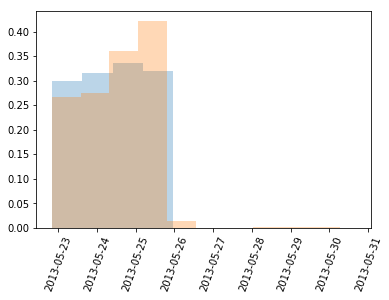

In [11]:
plt.hist(data['datetime'].values, bins=10, density  = True, alpha = .3)
plt.hist(data[data['x']==2]['datetime'].values, bins=10, density  = True, alpha = .3)
plt.xticks(rotation=70)
plt.show()

In [13]:
data = data.fillna('0')

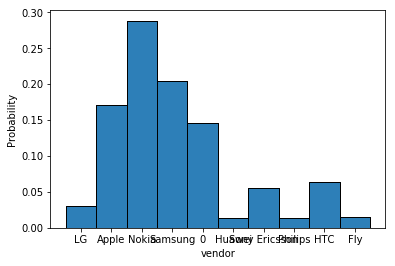

In [22]:
vendor_type = data[data['x']>-1]['vendor'].value_counts().reset_index().head(10)
sns.histplot(data[data['vendor'].isin(vendor_type['index'])], x='vendor', stat="probability")
sns.histplot(data[data['vendor'].isin(vendor_type['index'])], x='vendor', stat="probability")

In [23]:
data['msisdn'].nunique()

2361

In [32]:
data[data['imei'] == '868947012142650']['msisdn'].unique()

array([158527183389, 158503655953], dtype=int64)

In [27]:
data.groupby(['imei'])['msisdn'].nunique().reset_index().sort_values('msisdn', ascending = False)

,imei,msisdn
0,0,942
517,351958052496770,2
1249,354716050958780,2
536,352012080850010,2
1218,354586058119160,2
2285,359828043346160,2
1681,356836020220120,2
2516,868947012402650,2
2515,868947012142650,2
1,001060000012340,2


In [33]:
data.groupby(['msisdn'])['imei'].nunique().reset_index().sort_values('imei', ascending = False)

,msisdn,imei
2335,158599668691,5
19,158500408895,5
2348,158599838071,5
906,158522925255,5
438,158508817399,4
465,158509276523,4
374,158507300273,4
1101,158525410379,4
139,158502344213,4
1712,158533540347,4


In [37]:
data_bs = data.groupby(['long', 'lat'])[ 'msisdn'].count().reset_index()

(4144, 3)

In [34]:
data.columns

Index(['lac', 'cid', 'msisdn', 'imei', 'event_type', 'tstamp', 'long', 'lat',
       'max_dist', 'cell_type', 'start_angle', 'end_angle', 'datetime', 'tac',
       'Номер', 'Обозначение', 'Описание', 'vendor', 'platform', 'type', '0_x',
       '1_x', '0_y', '1_y', 'x'],
      dtype='object')